# Parkway Project Use Case 2 (Time Series Revenue Prediction)

In [10]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
#from pandas import datetime
#from matplotlib import pyplot

In [11]:
# Load the CSV file
CSV_FILE = 'ID_HospRevenue_2017_2019_ByWeek.csv'
series = pd.read_csv(CSV_FILE, parse_dates=True, index_col=0)
print(series.head())

               REVENUE
Start_Date            
2017-01-01  2659489.14
2017-01-08  3760130.60
2017-01-15  2592270.63
2017-01-22  2672616.29
2017-01-29  3098990.90


NameError: name 'pltt' is not defined

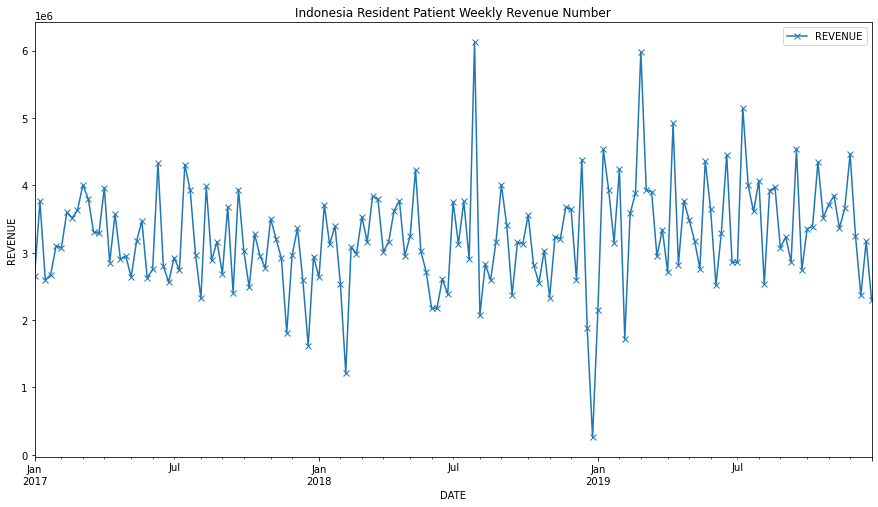

In [12]:
# Plot the time series data
series.plot(figsize=(15, 8), marker='x', title='Indonesia Resident Patient Weekly Revenue Number')
plt.xlabel('DATE')
plt.ylabel('REVENUE')
pltt.show()

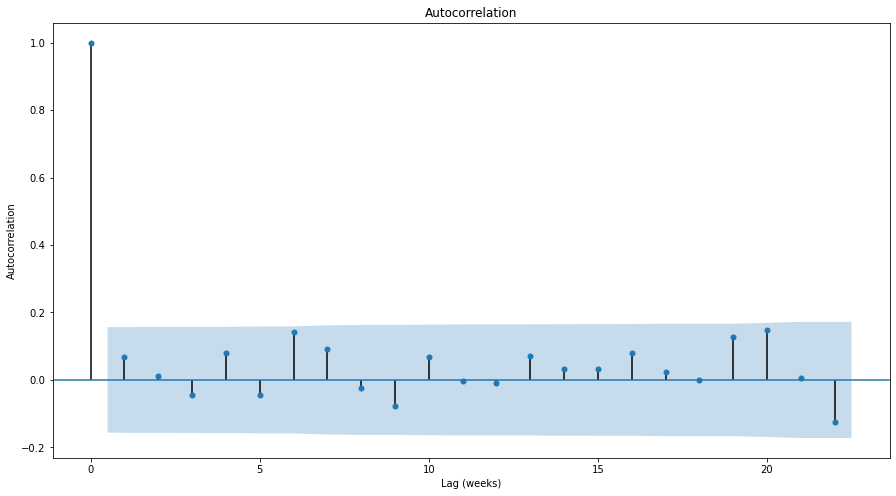

In [13]:
# Autocorrelation
#pd.plotting.autocorrelation_plot(series)
#plt.figure(figsize=(15, 8))
#plt.show()
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(15, 8))
plot_acf(series['REVENUE'], ax=ax)
ax.set_ylabel('Autocorrelation')
ax.set_xlabel('Lag (weeks)')
plt.show()
# from the picture below we choose the first 6 lags

## Start of ARIMA model

In [14]:
# ARIMA Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(6,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\HCAND\anaconda3\envs\psupr\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                REVENUE   No. Observations:                  157
Model:                     ARMA(6, 0)   Log Likelihood               -2347.966
Method:                       css-mle   S.D. of innovations         755886.626
Date:                Thu, 22 Oct 2020   AIC                           4711.932
Time:                        17:05:22   BIC                           4736.382
Sample:                    01-01-2017   HQIC                          4721.862
                         - 12-29-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.235e+06   7.55e+04     42.865      0.000    3.09e+06    3.38e+06
ar.L1.REVENUE     0.0877      0.079      1.106      0.269      -0.068       0.243
ar.L2.REVENUE    -0.0087      0.079     

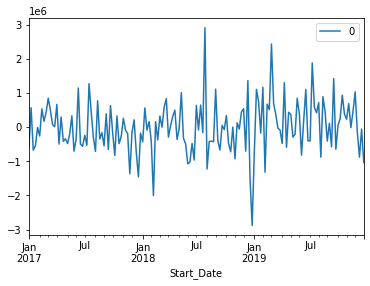

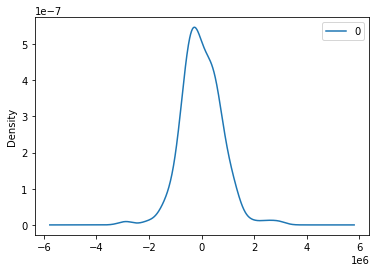

                  0
count  1.570000e+02
mean  -9.485347e+02
std    7.585214e+05
min   -2.879574e+06
25%   -4.781257e+05
50%   -5.795463e+04
75%    4.514433e+05
max    2.907925e+06


In [15]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

train size is: 103
test size is: 54
predicted=3075618.110442, expected=1876419.900000
predicted=3315915.605733, expected=255878.850000
predicted=2866272.678566, expected=2154884.430000
predicted=3144046.888878, expected=4535589.550000
predicted=3391321.560626, expected=3929627.570000
predicted=3044788.671004, expected=3149660.680000
predicted=3093490.871255, expected=4236873.880000
predicted=3496254.989160, expected=1721837.960000
predicted=2809197.283387, expected=3580960.780000
predicted=2945890.495667, expected=3881701.320000
predicted=3241747.766022, expected=5982602.470000
predicted=3055129.956407, expected=3930799.760000
predicted=3160348.311255, expected=3903346.230000
predicted=2735253.649495, expected=2945064.880000
predicted=3134686.317043, expected=3341908.450000
predicted=2962970.373646, expected=2708368.830000
predicted=3265795.106877, expected=4918707.020000
predicted=3347468.011498, expected=2821504.520000
predicted=3305804.180002, expected=3768679.430000
predicted=28940

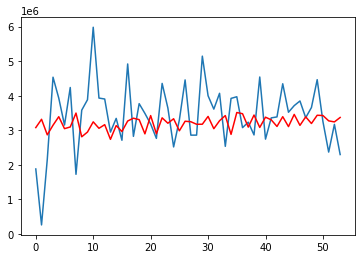

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Rolling Forecast ARIMA model
X = series.values
size = int(len(X)*0.66)
train, test = X[0:size], X[size:len(X)]
print('train size is:', size)
print('test size is:', len(X)-size)
history = [x for x in train]
predictions = list()
for t in range (len(test)):
    model = ARIMA(history,order=(6,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
error_mse = mean_squared_error(test,predictions)
error_mae = mean_absolute_error(test,predictions)
print('Test MSE: %.3f' % error_mse)
print('Test MAE: %.3f' % error_mae)

# Plot the error
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


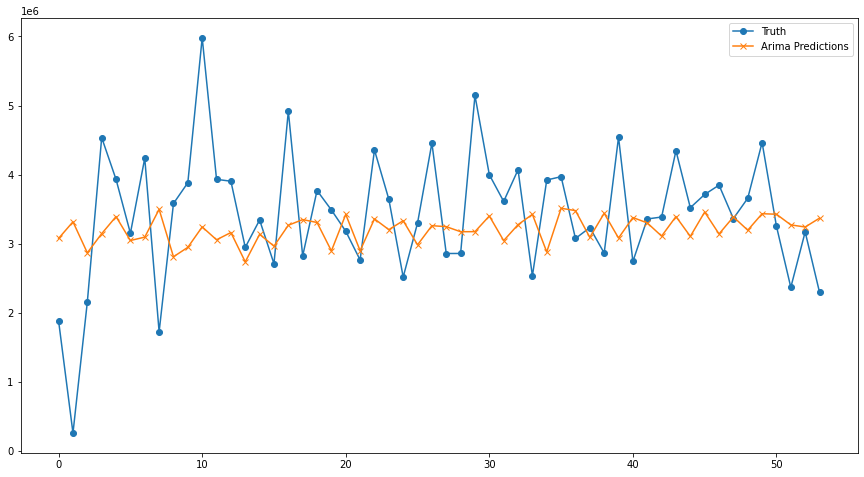

test data (actual) type is  <class 'numpy.ndarray'>
predictions data type is <class 'list'>


In [18]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(test, label='Truth', marker='o')
ax.plot(predictions, label='Arima Predictions', marker='x')
ax.legend()
plt.show()
print('test data (actual) type is ', type(test))
print('predictions data type is', type(predictions))

In [19]:
import numpy as np
# Function to show various error measurement
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    mse = np.mean((forecast - actual)**2)  # MSE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    #corr = np.corrcoef(forecast, actual)[0,1]   # corr
    #mins = np.amin(np.hstack([forecast[:,None], 
    #                          actual[:,None]]), axis=1)
    #maxs = np.amax(np.hstack([forecast[:,None], 
    #                          actual[:,None]]), axis=1)
    #minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    #return({'mape':mape, 'me':me, 'mae': mae, 
    #        'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
    #        'corr':corr, 'minmax':minmax})
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'mse':mse, 'rmse':rmse})

forecast_accuracy(predictions, test)

{'mape': 0.42619692749642285,
 'me': -228466.9305391664,
 'mae': 753582.7795691834,
 'mpe': 0.1954761148314077,
 'mse': 946360530436.5908,
 'rmse': 972810.6344179173}

## End of ARIMA Model

## Start of Neural Net Model

In [20]:
# visualisation
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# dataset downloading
import io
import requests
import zipfile

# data processing
import pandas as pd

# models
from sklearn.model_selection import train_test_split
import tensorflow as tf

# for saving the processed dataset
import pickle

plt.style.use('seaborn-whitegrid')

Update `CSV_FILE` to use the correct .csv filename. Some zip files contain multiple datasets.

In [21]:
# Note: update CSV_FILE to the .csv filename from above
CSV_FILE = 'ID_HospRevenue_2017_2019_ByWeek.csv'

df = pd.read_csv(CSV_FILE, parse_dates=True, index_col=0)
df.head()

,REVENUE
Start_Date,
2017-01-01,2659489.14
2017-01-08,3760130.60
2017-01-15,2592270.63
2017-01-22,2672616.29
2017-01-29,3098990.90


# Data Exploration

1. Plot the dataset
2. Compute the min, max, etc
3. Plot the autocorrelation

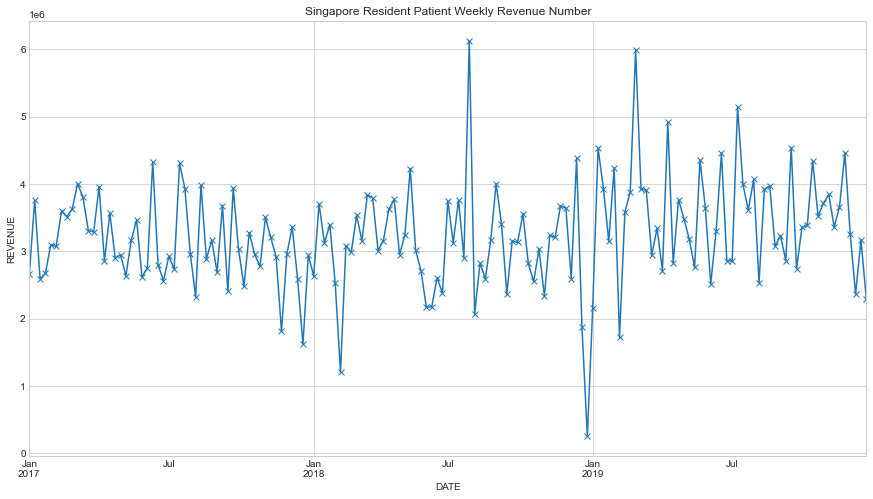

In [22]:
df['REVENUE'].plot(figsize=(15, 8), marker='x', title='Singapore Resident Patient Weekly Revenue Number')
plt.xlabel('DATE')
plt.ylabel('REVENUE')
plt.show()

In [23]:
df['REVENUE'].describe()

count    1.570000e+02
mean     3.234954e+06
std      7.739948e+05
min      2.558789e+05
25%      2.763313e+06
50%      3.163593e+06
75%      3.705695e+06
max      6.126150e+06
Name: REVENUE, dtype: float64

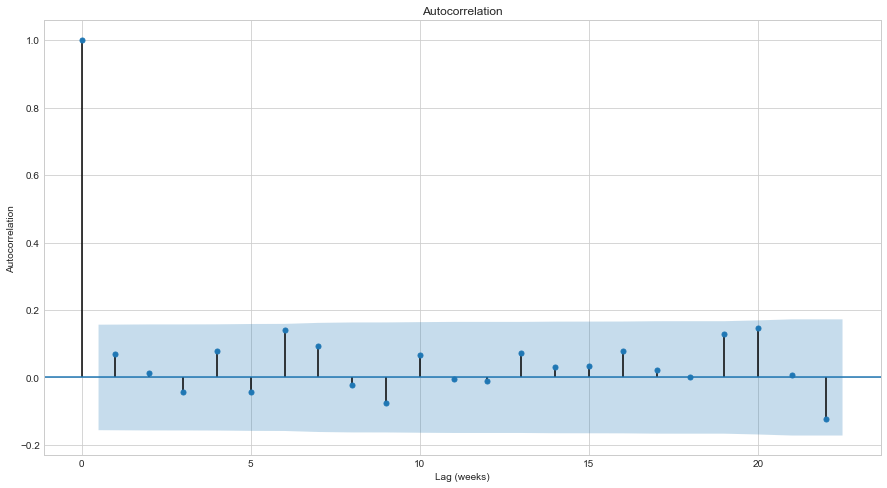

In [24]:
fig, ax = plt.subplots(figsize=(15, 8))
plot_acf(df['REVENUE'], ax=ax)
ax.set_ylabel('Autocorrelation')
ax.set_xlabel('Lag (weeks)')
plt.show()

In [25]:
window_size = 6 # largest number of lags above the 95% confidence band

## Windowing

1. Create shifted windows of the dataset.
2. Use this to setup our inputs and target.

In [26]:
# original dataset
df['REVENUE']

Start_Date
2017-01-01    2659489.14
2017-01-08    3760130.60
2017-01-15    2592270.63
2017-01-22    2672616.29
2017-01-29    3098990.90
                 ...    
2019-12-01    4463993.91
2019-12-08    3250925.17
2019-12-15    2366164.15
2019-12-22    3169237.36
2019-12-29    2294442.83
Name: REVENUE, Length: 157, dtype: float64

In [27]:
# shift up 1 step in time using -1
# (note the date index does not change, we'll fix that later)
df['REVENUE'].shift(-1)

Start_Date
2017-01-01    3760130.60
2017-01-08    2592270.63
2017-01-15    2672616.29
2017-01-22    3098990.90
2017-01-29    3073205.85
                 ...    
2019-12-01    3250925.17
2019-12-08    2366164.15
2019-12-15    3169237.36
2019-12-22    2294442.83
2019-12-29           NaN
Name: REVENUE, Length: 157, dtype: float64

In [28]:
# shift up in time using -2
# (note the quarter index does not change, we'll fix that later)
df['REVENUE'].shift(-2)

Start_Date
2017-01-01    2592270.63
2017-01-08    2672616.29
2017-01-15    3098990.90
2017-01-22    3073205.85
2017-01-29    3597591.52
                 ...    
2019-12-01    2366164.15
2019-12-08    3169237.36
2019-12-15    2294442.83
2019-12-22           NaN
2019-12-29           NaN
Name: REVENUE, Length: 157, dtype: float64

In [29]:
# shift up in time using -3
# (note the quarter index does not change, we'll fix that later)
df['REVENUE'].shift(-3)

Start_Date
2017-01-01    2672616.29
2017-01-08    3098990.90
2017-01-15    3073205.85
2017-01-22    3597591.52
2017-01-29    3514674.25
                 ...    
2019-12-01    3169237.36
2019-12-08    2294442.83
2019-12-15           NaN
2019-12-22           NaN
2019-12-29           NaN
Name: REVENUE, Length: 157, dtype: float64

In [30]:
# column-wise concatenation

# List comprehension, equivalent to:
# new_columns = []
# for i in range(window_size):
#    new_columns.append(df['value'].shift(-i))
new_columns = [df['REVENUE'].shift(-i) for i in range(window_size+1)]
new_column_names = [f't+{i}' for i in range(window_size+1)]

df_windowed = pd.concat(new_columns, axis=1)
df_windowed.columns = new_column_names
df_windowed

,t+0,t+1,t+2,t+3,t+4,t+5,t+6
Start_Date,,,,,,,
2017-01-01,2659489.14,3760130.60,2592270.63,2672616.29,3098990.90,3073205.85,3597591.52
2017-01-08,3760130.60,2592270.63,2672616.29,3098990.90,3073205.85,3597591.52,3514674.25
2017-01-15,2592270.63,2672616.29,3098990.90,3073205.85,3597591.52,3514674.25,3628235.25
2017-01-22,2672616.29,3098990.90,3073205.85,3597591.52,3514674.25,3628235.25,4006259.57
2017-01-29,3098990.90,3073205.85,3597591.52,3514674.25,3628235.25,4006259.57,3800597.55
...,...,...,...,...,...,...,...
2019-12-01,4463993.91,3250925.17,2366164.15,3169237.36,2294442.83,NaN,NaN
2019-12-08,3250925.17,2366164.15,3169237.36,2294442.83,NaN,NaN,NaN
2019-12-15,2366164.15,3169237.36,2294442.83,NaN,NaN,NaN,NaN


In [31]:
# cleanup the NaN at the bottom of the dataset
df_windowed.dropna(inplace=True)
df_windowed

,t+0,t+1,t+2,t+3,t+4,t+5,t+6
Start_Date,,,,,,,
2017-01-01,2659489.14,3760130.60,2592270.63,2672616.29,3098990.90,3073205.85,3597591.52
2017-01-08,3760130.60,2592270.63,2672616.29,3098990.90,3073205.85,3597591.52,3514674.25
2017-01-15,2592270.63,2672616.29,3098990.90,3073205.85,3597591.52,3514674.25,3628235.25
2017-01-22,2672616.29,3098990.90,3073205.85,3597591.52,3514674.25,3628235.25,4006259.57
2017-01-29,3098990.90,3073205.85,3597591.52,3514674.25,3628235.25,4006259.57,3800597.55
...,...,...,...,...,...,...,...
2019-10-20,4345376.96,3520102.30,3711891.75,3846633.57,3362790.16,3657010.36,4463993.91
2019-10-27,3520102.30,3711891.75,3846633.57,3362790.16,3657010.36,4463993.91,3250925.17
2019-11-03,3711891.75,3846633.57,3362790.16,3657010.36,4463993.91,3250925.17,2366164.15


In [32]:
# Formulate our problem

df_windowed.columns

Index(['t+0', 't+1', 't+2', 't+3', 't+4', 't+5', 't+6'], dtype='object')

In [33]:
# the target we want to predict (lowercase y is a convention for a vector)
y = df_windowed['t+6']

# the input data (uppercase X is a convention for a matrix)
X = df_windowed.drop(columns=['t+6'])

X.shape, y.shape

((151, 6), (151,))

## Neural Network

1. Create a neural network using Tensorflow-Keras
2. Split the dataset into training and test sets
3. Train the neural network using the training set.
4. Evaluate the neural network using the test set.



In [34]:
# https://www.tensorflow.org/guide/keras/overview
# Create a simple Neural Network with 2 Dense Layers
from tensorflow.keras import layers

model = tf.keras.Sequential()
#model.add(layers.Dense(32, input_shape=(3,), activation='relu'))
model.add(layers.Dense(32, input_shape=(6,), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.25))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                224       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [35]:
#X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle = False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((101, 6), (50, 6), (101,), (50,))

In [36]:
# Note that the data is shuffled in time
# This is okay because we already preserved the history!
#
# If this bothers you, you can use train_test_split(X, y, shuffle=False)
# It does affect how the Neural Network is initialised, but since we
# will be go through the dataset multiple rounds, it doesn't really matter.
#
# It may matter if your dataset is huge, because the Neural Network training
# gets more chances see the older data. 
X_train

,t+0,t+1,t+2,t+3,t+4,t+5
Start_Date,,,,,,
2017-01-01,2659489.14,3760130.60,2592270.63,2672616.29,3098990.90,3073205.85
2017-01-08,3760130.60,2592270.63,2672616.29,3098990.90,3073205.85,3597591.52
2017-01-15,2592270.63,2672616.29,3098990.90,3073205.85,3597591.52,3514674.25
2017-01-22,2672616.29,3098990.90,3073205.85,3597591.52,3514674.25,3628235.25
2017-01-29,3098990.90,3073205.85,3597591.52,3514674.25,3628235.25,4006259.57
...,...,...,...,...,...,...
2018-11-04,2333579.23,3236234.95,3208991.57,3674856.72,3643018.99,2595637.75
2018-11-11,3236234.95,3208991.57,3674856.72,3643018.99,2595637.75,4380445.37
2018-11-18,3208991.57,3674856.72,3643018.99,2595637.75,4380445.37,1876419.90


In [37]:
# What matters is that each row of X_train and each row of y_train
# are for the same quarter!
y_train

Start_Date
2017-01-01    3597591.52
2017-01-08    3514674.25
2017-01-15    3628235.25
2017-01-22    4006259.57
2017-01-29    3800597.55
                 ...    
2018-11-04    4380445.37
2018-11-11    1876419.90
2018-11-18     255878.85
2018-11-25    2154884.43
2018-12-02    4535589.55
Name: t+6, Length: 101, dtype: float64

In [38]:
# train!
# Note: if you have more data, you can split the dataset 3 ways:
#  train, validation, test
# And then use the validation set (e.g. X_val, y_val) in validation_data

model.compile(optimizer='Adam', loss='mse', metrics=['mape'])
history = model.fit(X_train, y_train, batch_size=8, epochs=250,
                    validation_data=(X_test, y_test))

Train on 101 samples, validate on 50 samples
Epoch 1/250
101/101 [==============================] - 1s 5ms/sample - loss: 3302377984446.0991 - mape: 57.0233 - val_loss: 817289806479.3600 - val_mape: 20.3138
Epoch 2/250
101/101 [==============================] - 0s 297us/sample - loss: 1559612654541.3069 - mape: 40.8461 - val_loss: 808630221537.2800 - val_mape: 19.3993
Epoch 3/250
101/101 [==============================] - 0s 277us/sample - loss: 1312619915892.5940 - mape: 37.1577 - val_loss: 860162793799.6801 - val_mape: 19.4175
Epoch 4/250
101/101 [==============================] - 0s 307us/sample - loss: 896791852021.8615 - mape: 35.6238 - val_loss: 902749787258.8801 - val_mape: 19.6898
Epoch 5/250
101/101 [==============================] - 0s 297us/sample - loss: 884701739596.0397 - mape: 30.7481 - val_loss: 946294275440.6400 - val_mape: 20.1248
Epoch 6/250
101/101 [==============================] - 0s 287us/sample - loss: 1036764775373.3069 - mape: 37.0391 - val_loss: 988760461803.

101/101 [==============================] - 0s 287us/sample - loss: 690361752545.5842 - mape: 31.3702 - val_loss: 1343208258273.2800 - val_mape: 24.8938
Epoch 51/250
101/101 [==============================] - 0s 257us/sample - loss: 632342657612.0396 - mape: 29.9320 - val_loss: 1282360947507.2000 - val_mape: 24.1165
Epoch 52/250
101/101 [==============================] - 0s 267us/sample - loss: 632824899401.5049 - mape: 30.1235 - val_loss: 1328543412387.8401 - val_mape: 24.5544
Epoch 53/250
101/101 [==============================] - 0s 287us/sample - loss: 727991417906.6931 - mape: 33.1340 - val_loss: 1378728174551.0400 - val_mape: 25.2015
Epoch 54/250
101/101 [==============================] - 0s 277us/sample - loss: 733219689218.5347 - mape: 31.7934 - val_loss: 1194443090821.1201 - val_mape: 23.1296
Epoch 55/250
101/101 [==============================] - 0s 267us/sample - loss: 684168514732.3564 - mape: 32.9623 - val_loss: 1142819588669.4399 - val_mape: 22.5504
Epoch 56/250
101/101 [=

Epoch 100/250
101/101 [==============================] - 0s 297us/sample - loss: 616137688986.6139 - mape: 29.7088 - val_loss: 1544589526958.0801 - val_mape: 27.0110
Epoch 101/250
101/101 [==============================] - 0s 297us/sample - loss: 605065221515.4060 - mape: 30.0281 - val_loss: 1433373795287.0400 - val_mape: 25.8758
Epoch 102/250
101/101 [==============================] - 0s 297us/sample - loss: 595993290082.8514 - mape: 27.3028 - val_loss: 1463697358848.0000 - val_mape: 26.2121
Epoch 103/250
101/101 [==============================] - 0s 287us/sample - loss: 653729574952.5544 - mape: 31.5654 - val_loss: 1201460456980.4800 - val_mape: 23.1298
Epoch 104/250
101/101 [==============================] - 0s 267us/sample - loss: 652686273627.2474 - mape: 31.5450 - val_loss: 1668057599836.1599 - val_mape: 28.1690
Epoch 105/250
101/101 [==============================] - 0s 297us/sample - loss: 616909063928.3960 - mape: 29.3746 - val_loss: 1400916705935.3601 - val_mape: 25.3627
Epoc

101/101 [==============================] - 0s 287us/sample - loss: 565098832601.9802 - mape: 29.1208 - val_loss: 1498890655498.2400 - val_mape: 26.3354
Epoch 150/250
101/101 [==============================] - 0s 277us/sample - loss: 549098564699.2475 - mape: 28.9898 - val_loss: 1421431453122.5601 - val_mape: 25.5767
Epoch 151/250
101/101 [==============================] - 0s 267us/sample - loss: 585693729214.0990 - mape: 28.4985 - val_loss: 1579655247953.9199 - val_mape: 27.2410
Epoch 152/250
101/101 [==============================] - 0s 257us/sample - loss: 658332863822.5743 - mape: 31.9488 - val_loss: 1240089751715.8401 - val_mape: 23.7500
Epoch 153/250
101/101 [==============================] - 0s 277us/sample - loss: 565117382858.7722 - mape: 29.9079 - val_loss: 1553150886543.3601 - val_mape: 26.7764
Epoch 154/250
101/101 [==============================] - 0s 277us/sample - loss: 605451012805.7030 - mape: 30.4065 - val_loss: 1313992735457.2800 - val_mape: 24.3691
Epoch 155/250
101/

101/101 [==============================] - 0s 257us/sample - loss: 588568859718.9703 - mape: 28.8557 - val_loss: 1433108909916.1599 - val_mape: 25.6399
Epoch 199/250
101/101 [==============================] - 0s 277us/sample - loss: 614101287560.8713 - mape: 29.8636 - val_loss: 1616002994667.5200 - val_mape: 27.2729
Epoch 200/250
101/101 [==============================] - 0s 277us/sample - loss: 574893906751.3663 - mape: 27.6158 - val_loss: 1361532433203.2000 - val_mape: 24.9450
Epoch 201/250
101/101 [==============================] - 0s 267us/sample - loss: 537356040617.8218 - mape: 28.5957 - val_loss: 1533442203320.3201 - val_mape: 26.5312
Epoch 202/250
101/101 [==============================] - 0s 267us/sample - loss: 646406395113.1881 - mape: 30.1957 - val_loss: 1329457159208.9600 - val_mape: 24.7123
Epoch 203/250
101/101 [==============================] - 0s 277us/sample - loss: 655263514948.4357 - mape: 31.4885 - val_loss: 1772622619607.0398 - val_mape: 29.3224
Epoch 204/250
101/

101/101 [==============================] - 0s 257us/sample - loss: 578750263985.4257 - mape: 28.3314 - val_loss: 1335826423480.3201 - val_mape: 24.8380
Epoch 248/250
101/101 [==============================] - 0s 277us/sample - loss: 546920427722.7723 - mape: 28.8678 - val_loss: 1402740395212.8000 - val_mape: 25.3934
Epoch 249/250
101/101 [==============================] - 0s 297us/sample - loss: 568088432761.6633 - mape: 28.8712 - val_loss: 1482123817123.8401 - val_mape: 26.4101
Epoch 250/250
101/101 [==============================] - 0s 287us/sample - loss: 497891031465.8218 - mape: 27.5013 - val_loss: 1472230594314.2400 - val_mape: 26.4788


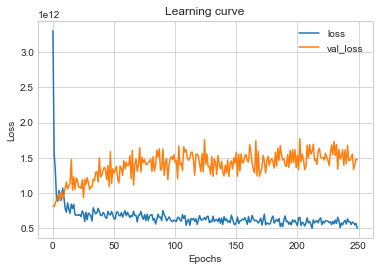

In [39]:
# Check for overfitting, which is when val_loss starts to go up but
# loss stays decreases or stays constant.

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Learning curve')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [40]:
model.save('model_id_revenue_prediction.h5')

In [41]:
# Get a prediction from our model for our data and plot it against the truth

y_pred = model.predict(X)

df_pred = pd.DataFrame(index=X.index, data={'predictions': y_pred.ravel()})
df_pred

,predictions
Start_Date,
2017-01-01,2246715.75
2017-01-08,2422099.00
2017-01-15,2576641.25
2017-01-22,2454913.25
2017-01-29,2669811.75
...,...
2019-10-20,2696046.25
2019-10-27,2825839.75
2019-11-03,2600260.00


In [42]:
type(y_pred)

numpy.ndarray

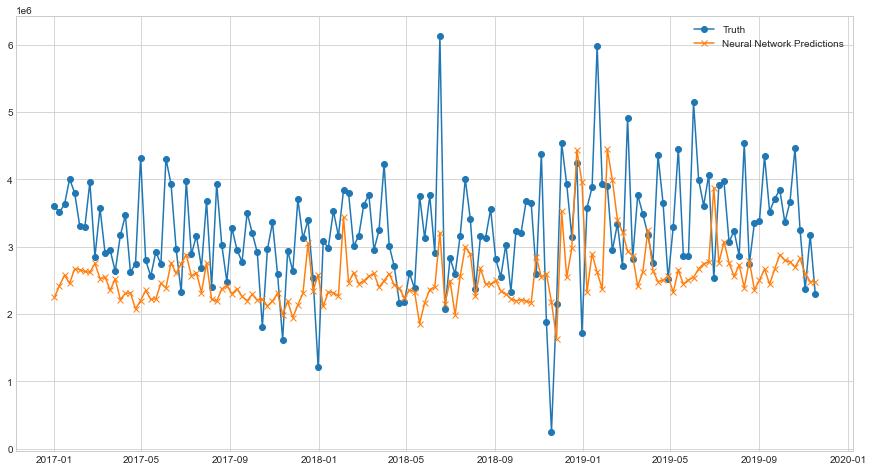

In [43]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(y, label='Truth', marker='o')
ax.plot(df_pred, label='Neural Network Predictions', marker='x')
ax.legend()
plt.show()

In [44]:
full_id_with_y_and_pred = pd.concat([X,y,df_pred],axis=1)
full_id_with_y_and_pred.to_csv('full_id_revenue_with_y_and_pred.csv')

In [45]:
# Get a prediction from our model for our data and plot it against the truth

y_pred_test = model.predict(X_test)

df_pred_test = pd.DataFrame(index=X_test.index, data={'predictions': y_pred_test.ravel()})
df_pred_test

,predictions
Start_Date,
2018-12-09,2543694.25
2018-12-16,2975223.25
2018-12-23,4431211.00
2018-12-30,3961161.25
2019-01-06,2329330.00
2019-01-13,2894250.50
2019-01-20,2618227.00
2019-01-27,2374107.25
2019-02-03,4449424.50


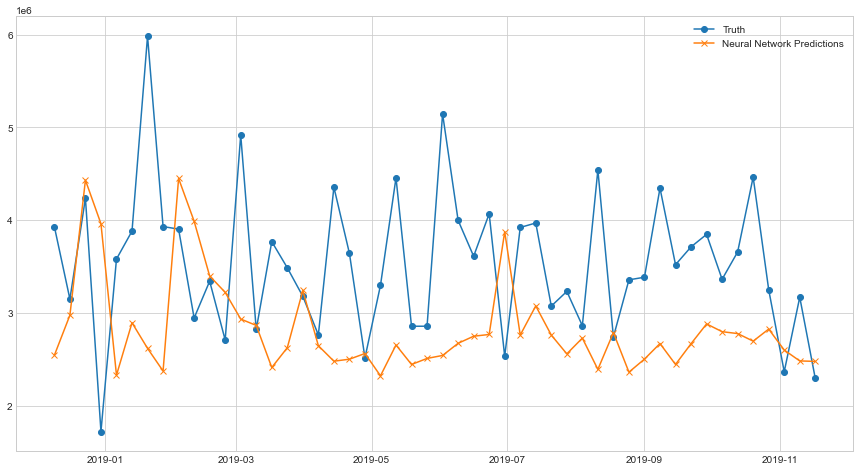

type of y_test is  <class 'pandas.core.series.Series'>
type of df_pred_test is  <class 'pandas.core.frame.DataFrame'>


In [46]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(y_test, label='Truth', marker='o')
ax.plot(df_pred_test, label='Neural Network Predictions', marker='x')
ax.legend()
plt.show()
print('type of y_test is ', type(y_test))
print('type of df_pred_test is ', type(df_pred_test))

In [47]:
forecast_accuracy(df_pred_test["predictions"].to_numpy(), y_test)

{'mape': 0.26478806958325907,
 'me': -708250.2729999999,
 'mae': 970446.3878,
 'mpe': -0.15167938856403457,
 'mse': 1472230696740.6387,
 'rmse': 1213355.140402281}

In [ ]:
#{'mape': 0.42619692749642285,
# 'me': -228466.9305391664,
# 'mae': 753582.7795691834,
# 'mpe': 0.1954761148314077,
# 'mse': 946360530436.5908,
# 'rmse': 972810.6344179173}